In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn import preprocessing, model_selection
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/techno/companies/company_preprocessed_data.csv')

In [3]:
dataset.head()

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,is_Closed,Active_Days
0,web,operating,2005,USA,2005.0,2008.0,3.0,39750000.0,2010.0,2013.0,5.0,17.0,47.606209,-122.332071,0,19.0
1,advertising,operating,2007,other,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,2.0,30.427755,-9.598107,0,17.0
2,cleantech,operating,2008,IND,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,4.0,22.307159,73.181219,0,16.0
3,advertising,operating,2008,USA,2011.0,2012.0,1.0,15167025.0,2008.0,2008.0,1.0,2.0,35.686975,-105.937799,0,16.0
4,games_video,operating,2008,USA,2011.0,2012.0,1.0,15167025.0,2008.0,2008.0,1.0,3.0,33.078655,-116.601964,0,16.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57437 entries, 0 to 57436
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       57437 non-null  object 
 1   status              57437 non-null  object 
 2   founded_at          57437 non-null  int64  
 3   country_code        57437 non-null  object 
 4   first_funding_at    57437 non-null  float64
 5   last_funding_at     57437 non-null  float64
 6   funding_rounds      57437 non-null  float64
 7   funding_total_usd   57437 non-null  float64
 8   first_milestone_at  57437 non-null  float64
 9   last_milestone_at   57437 non-null  float64
 10  milestones          57437 non-null  float64
 11  relationships       57437 non-null  float64
 12  lat                 57437 non-null  float64
 13  lng                 57437 non-null  float64
 14  is_Closed           57437 non-null  int64  
 15  Active_Days         57437 non-null  float64
dtypes: f

**uni-variant analysis**

In [5]:
dataset.describe()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,is_Closed,Active_Days
count,57437.000000,57437.000000,57437.000000,57437.000000,5.743700e+04,57437.000000,57437.000000,57437.000000,57437.000000,57437.000000,57437.000000,57437.000000,57437.000000
mean,2005.667497,2010.712711,2011.701882,1.284224,1.516703e+07,2010.701969,2011.463621,1.210579,4.217873,37.173714,-49.037751,0.027561,17.983443
std,9.624688,1.641011,1.436181,0.873293,3.305856e+07,3.195246,3.203732,0.553623,11.733152,16.066700,71.314515,0.163712,9.885192
min,1901.000000,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,1.000000,1.000000,-50.942326,-159.485278,0.000000,-40.000000
25%,2004.000000,2011.000000,2012.000000,1.000000,1.405000e+07,2010.000000,2011.000000,1.000000,2.000000,34.019454,-111.838973,0.000000,13.000000
50%,2008.000000,2011.000000,2012.000000,1.000000,1.516702e+07,2012.000000,2013.000000,1.000000,3.000000,39.739236,-75.166212,0.000000,15.000000
75%,2011.000000,2011.000000,2012.000000,1.000000,1.516702e+07,2012.000000,2013.000000,1.000000,4.000000,45.440847,2.352222,0.000000,20.000000
max,2014.000000,2013.000000,2013.000000,15.000000,2.600000e+09,2014.000000,2014.000000,9.000000,1189.000000,77.553604,176.165130,1.000000,123.000000


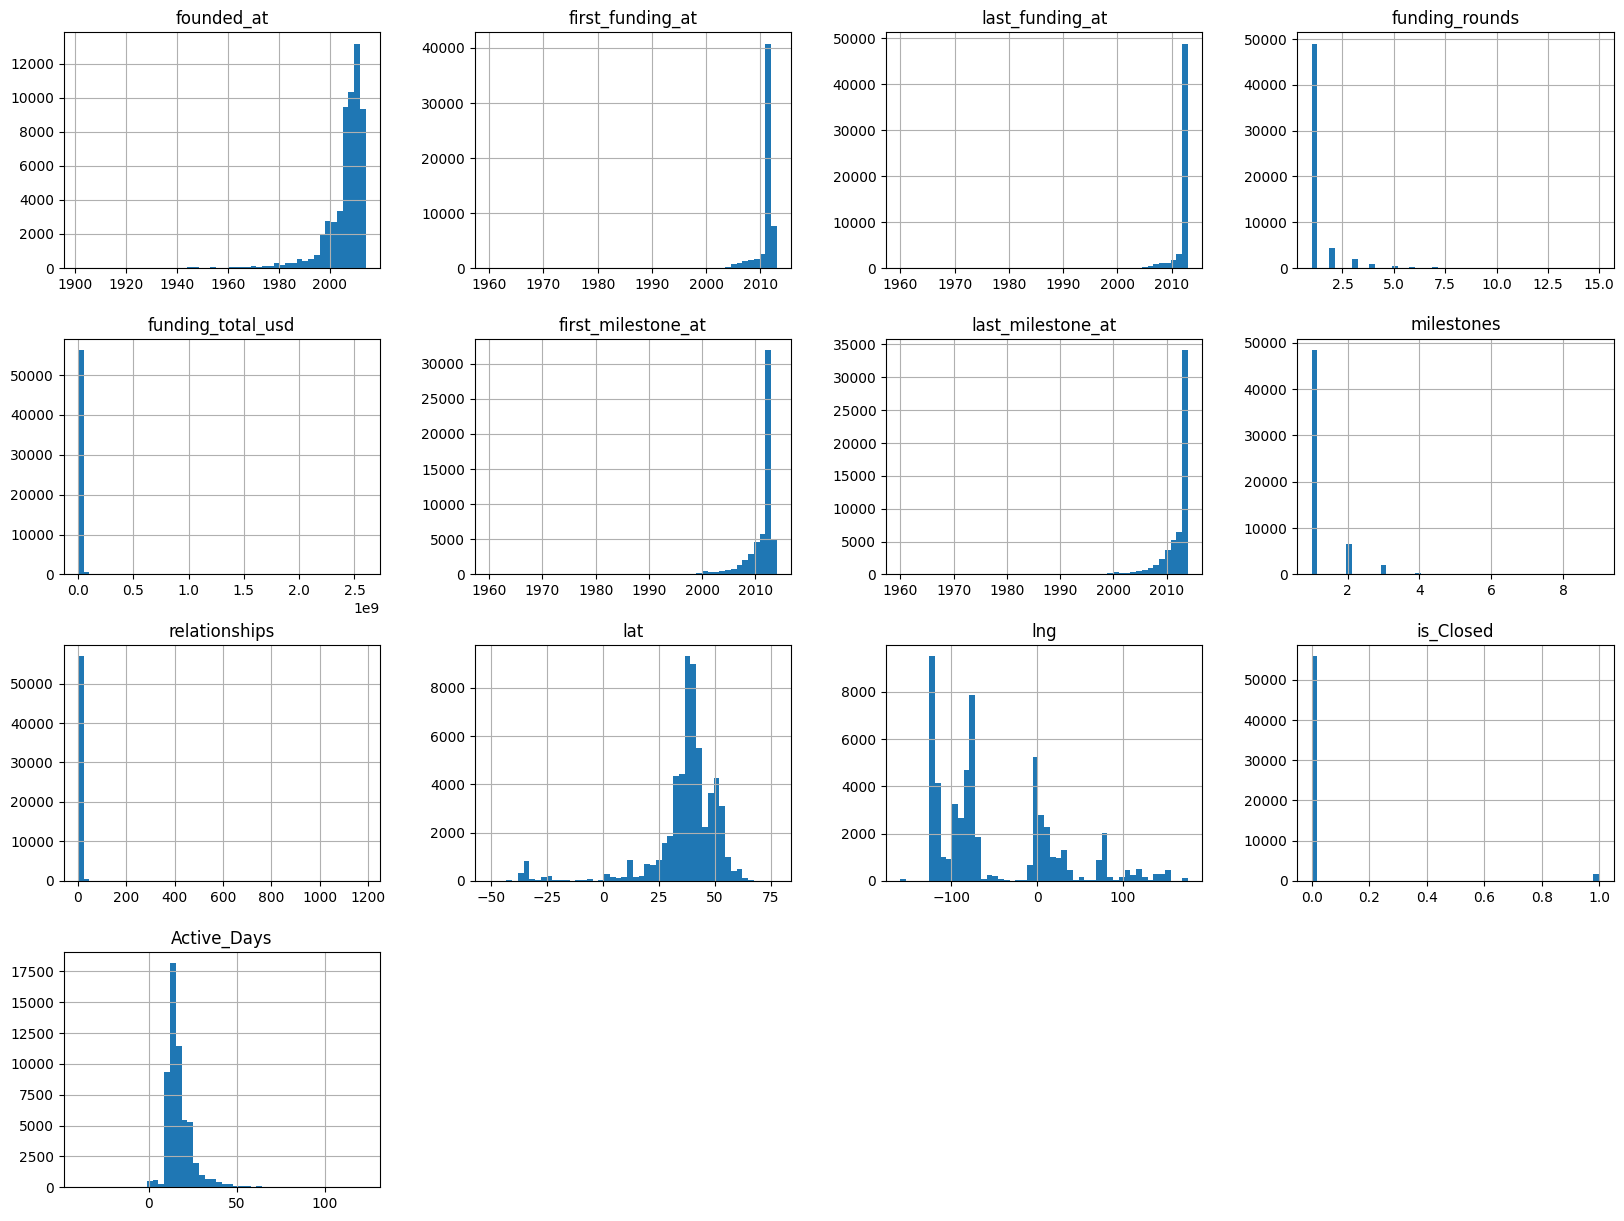

In [6]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

0    55854
1     1583
Name: is_Closed, dtype: int64


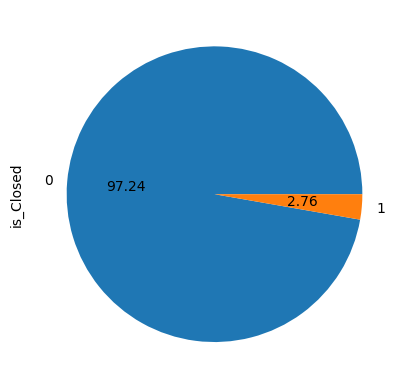

In [7]:
print(dataset.is_Closed.value_counts())
dataset['is_Closed'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

other               12775
software            10176
web                  6991
ecommerce            4610
mobile               3512
advertising          3404
consulting           2658
games_video          2580
enterprise           2456
biotech              2246
public_relations     1423
hardware             1412
network_hosting      1180
education            1105
cleantech             909
Name: category_code, dtype: int64


<ipython-input-8-37659e279766>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col].value_counts().index, y=dataset[col].value_counts(), palette="viridis")


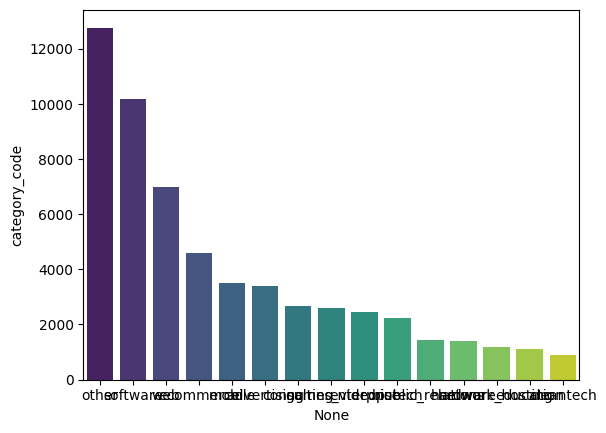

In [8]:
col = 'category_code'
print(dataset[col].value_counts())
#dataset[col].value_counts().plot(kind="barplot", autopct="%.2f")
sns.barplot(x=dataset[col].value_counts().index, y=dataset[col].value_counts(), palette="viridis")
plt.show()

USA      32902
GBR       4606
other     4038
IND       2871
CAN       2463
DEU       1308
FRA       1154
AUS        944
ESP        850
ISR        683
NLD        618
ITA        452
IRL        447
BRA        443
SWE        430
CHN        416
CHE        358
RUS        330
FIN        310
TUR        292
JPN        286
SGP        283
DNK        252
BEL        252
ARG        246
POL        203
Name: country_code, dtype: int64


<ipython-input-9-e7388688c3e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col].value_counts().index, y=dataset[col].value_counts(), palette="viridis")


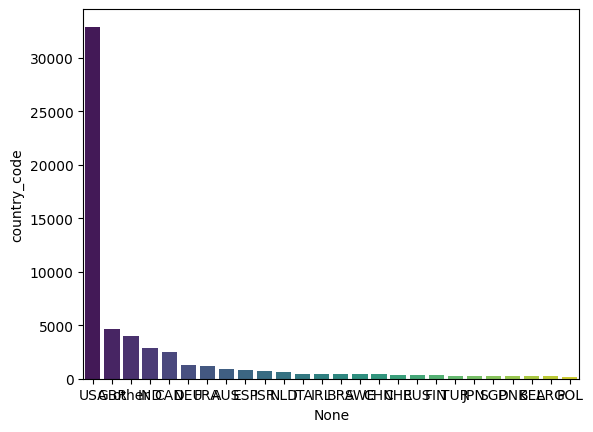

In [9]:
col = 'country_code'
print(dataset[col].value_counts())
#dataset[col].value_counts().plot(kind="barplot", autopct="%.2f")
sns.barplot(x=dataset[col].value_counts().index, y=dataset[col].value_counts(), palette="viridis")
plt.show()

**Bivariant Analysis**

In [10]:
dataset.corr()

<ipython-input-10-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,is_Closed,Active_Days
founded_at,1.000000,0.118000,0.091353,0.015474,-0.062518,0.220728,0.171079,-0.009392,-0.115423,-0.021367,0.051278,0.019573,-0.977146
first_funding_at,0.118000,1.000000,0.774234,-0.389391,-0.144573,0.113441,0.068635,-0.200481,-0.145854,-0.029882,0.049308,-0.181734,-0.075306
last_funding_at,0.091353,0.774234,1.000000,0.049860,0.034136,0.092107,0.066415,-0.063026,-0.072839,-0.024574,0.014094,-0.248149,-0.035091
funding_rounds,0.015474,-0.389391,0.049860,1.000000,0.290260,0.003721,0.041056,0.334090,0.154137,0.036894,-0.126631,0.022904,-0.019272
funding_total_usd,-0.062518,-0.144573,0.034136,0.290260,1.000000,-0.032268,-0.011107,0.143570,0.150451,-0.001996,-0.017900,-0.026219,0.066248
first_milestone_at,0.220728,0.113441,0.092107,0.003721,-0.032268,1.000000,0.917025,-0.098210,0.014130,0.000643,0.032704,-0.024504,-0.209040
last_milestone_at,0.171079,0.068635,0.066415,0.041056,-0.011107,0.917025,1.000000,0.078240,0.046327,0.004969,0.021641,-0.016163,-0.162688
milestones,-0.009392,-0.200481,-0.063026,0.334090,0.143570,-0.098210,0.078240,1.000000,0.259969,0.035995,-0.101747,0.040082,0.000691
relationships,-0.115423,-0.145854,-0.072839,0.154137,0.150451,0.014130,0.046327,0.259969,1.000000,0.011727,-0.059628,-0.009009,0.114281
lat,-0.021367,-0.029882,-0.024574,0.036894,-0.001996,0.000643,0.004969,0.035995,0.011727,1.000000,-0.281307,0.009738,0.018493


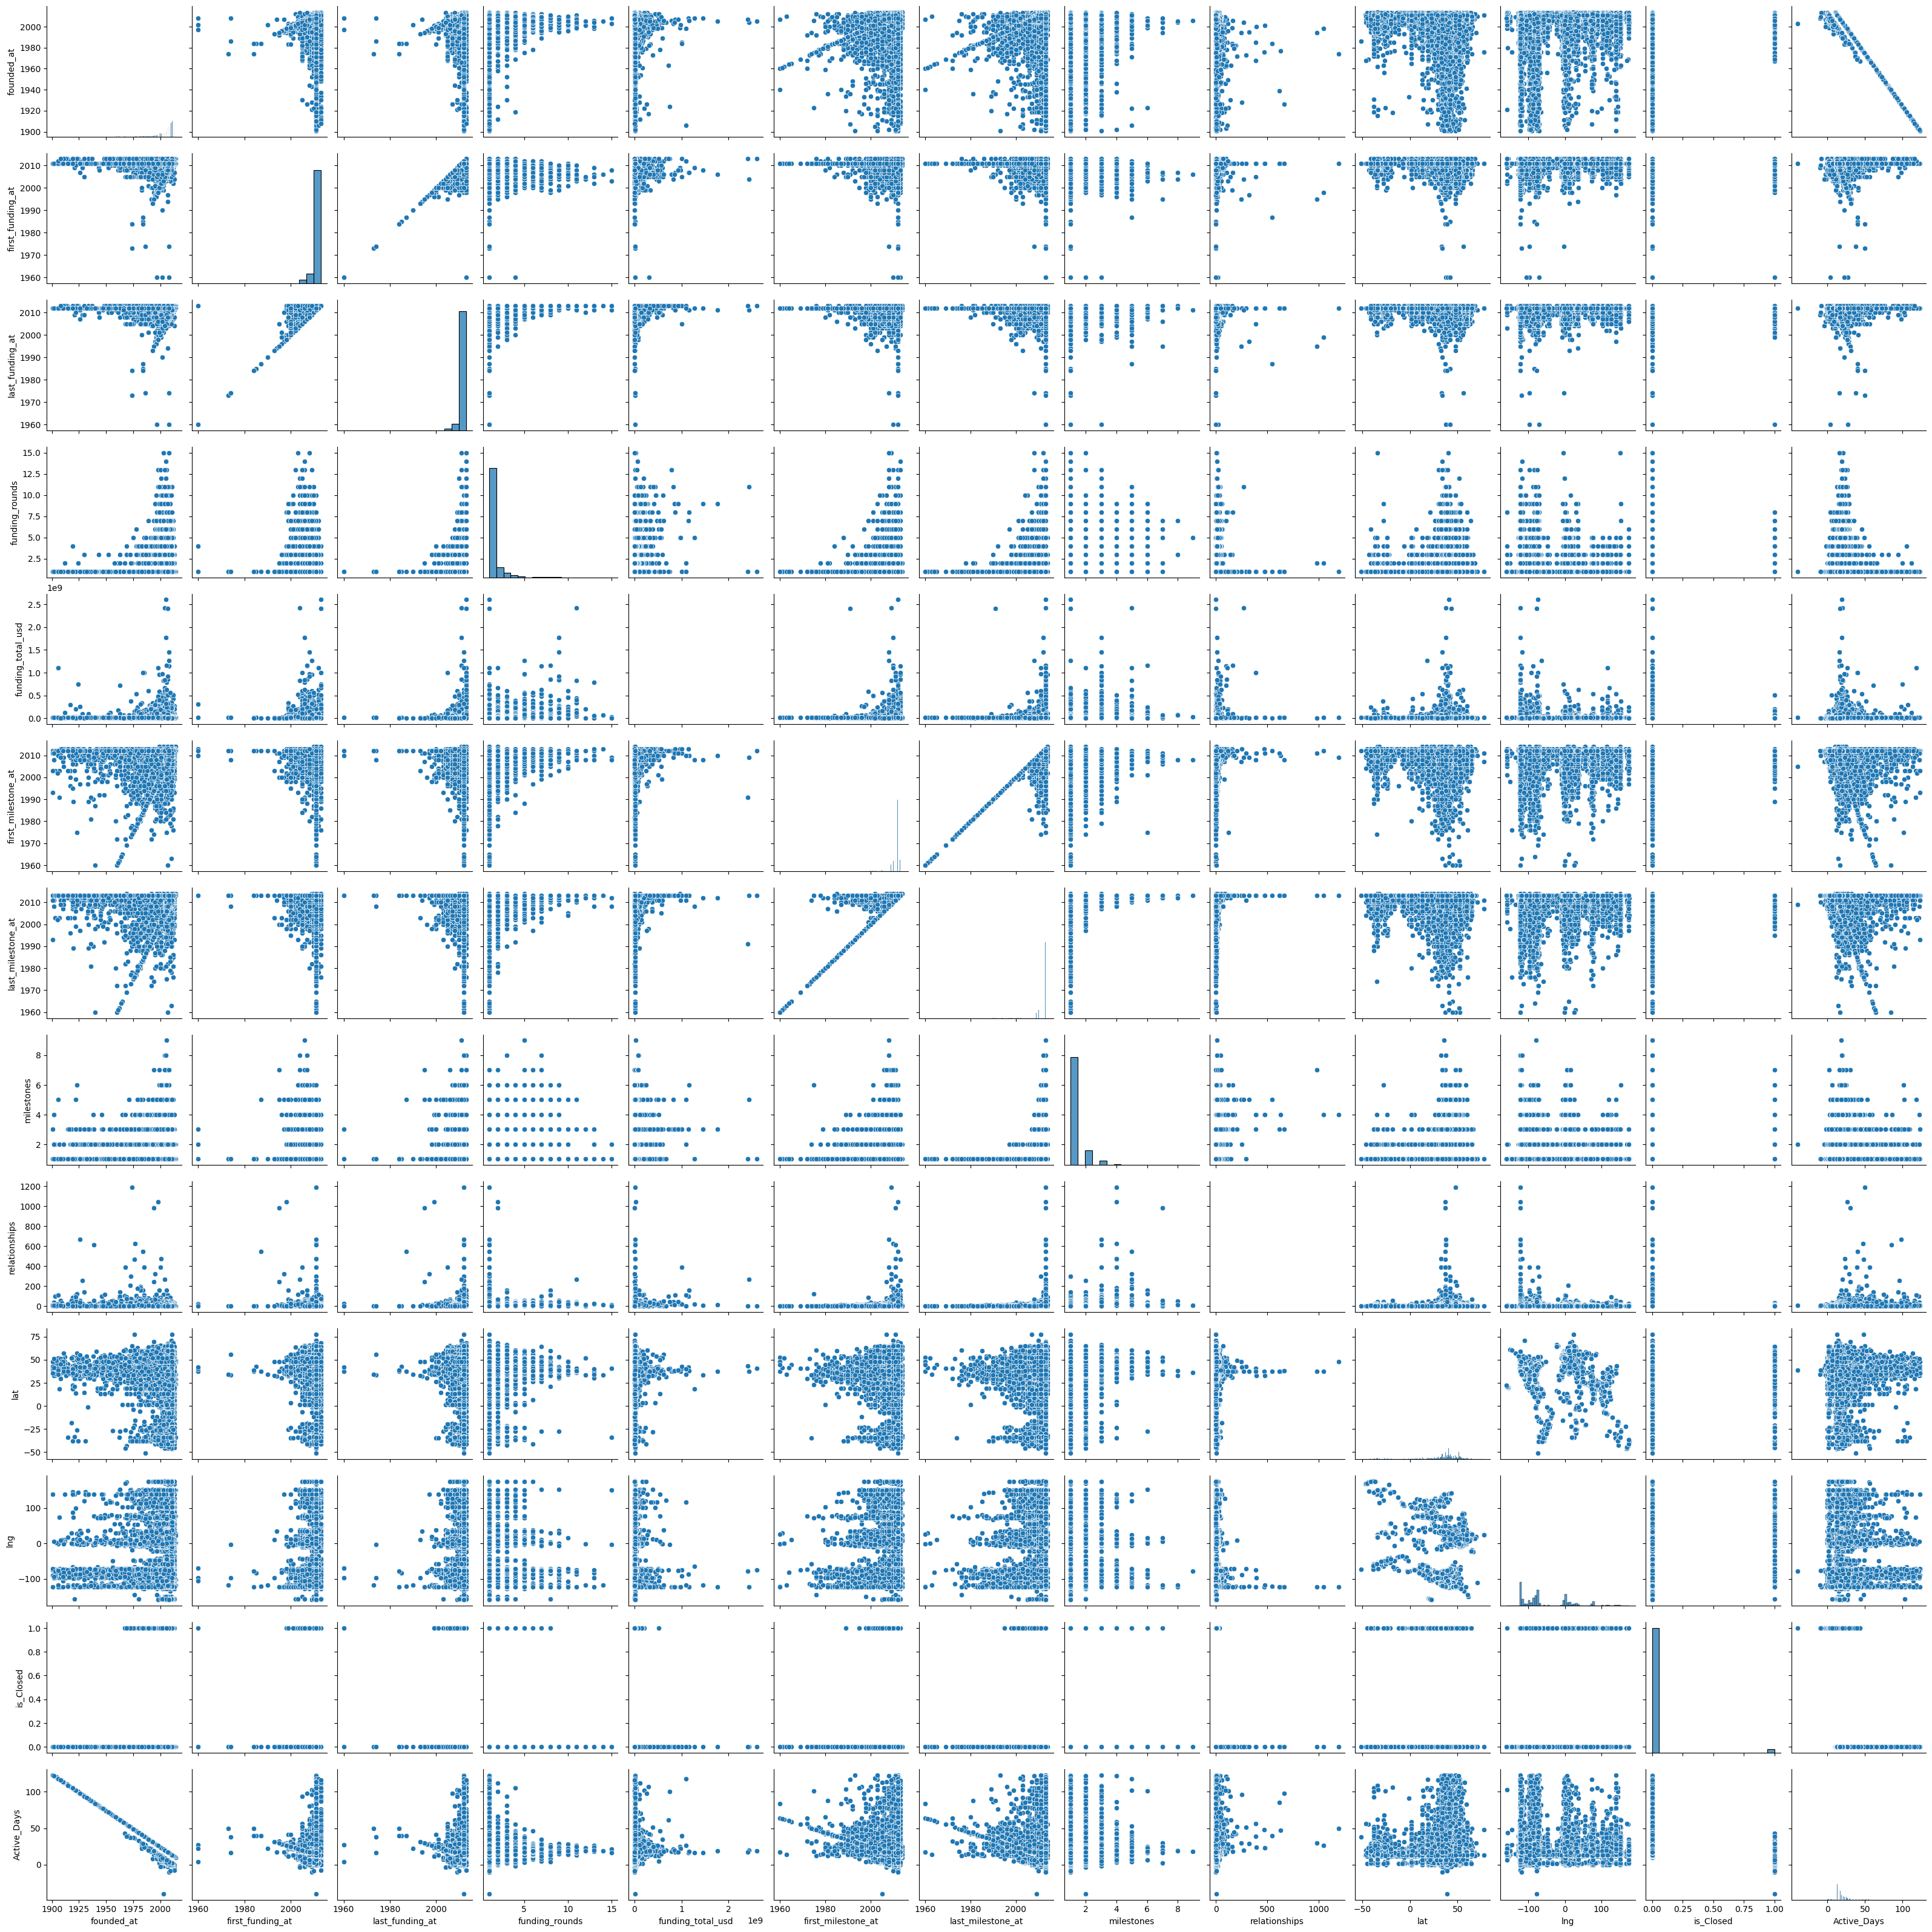

In [17]:
sns.pairplot(numerical_cols)
plt.show()

In [11]:
def plot(x,y):
    plt.scatter(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    print('Scatterpot between',x.name,'and',y.name)
    plt.show()

Scatterpot between lng and lat


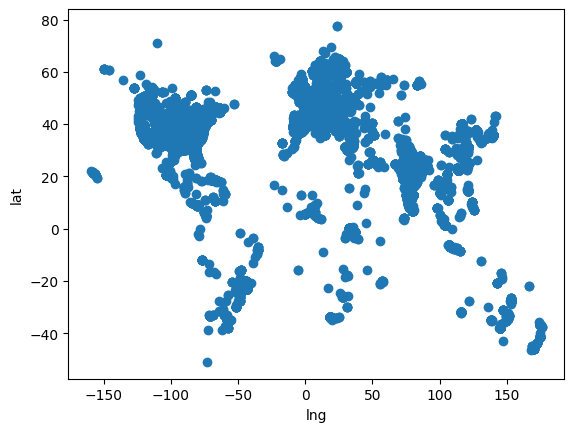

In [12]:
plot(dataset.lng,dataset.lat)

Scatterpot between funding_total_usd and category_code


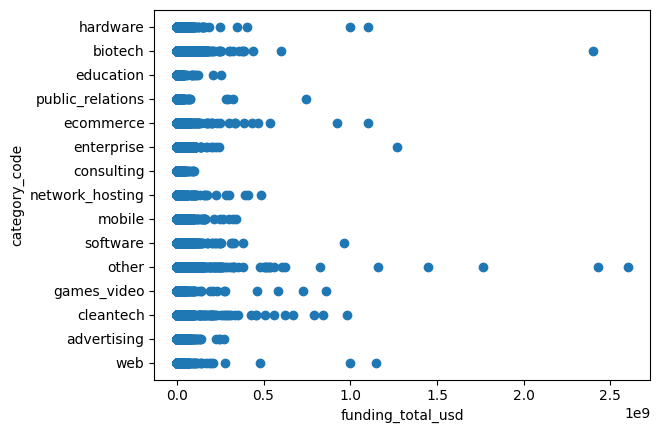

In [13]:
#funding_total_usd vs category_code

plot(x=dataset.funding_total_usd,y=dataset.category_code)

Mobile sector are having large amount of funding.

Then, Health,Social and biotech are next large amount of funding.

Manufacturing is the next in terms of fundings.

And the design category is funding the smallest amount among all.

Scatterpot between funding_rounds and category_code


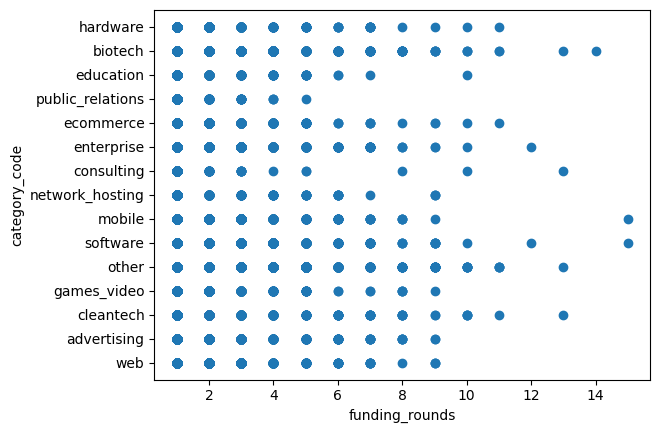

In [14]:
plot(dataset["funding_rounds"], dataset["category_code"])

Scatterplot between Funding Rounds and category code.

Mobile and software are the top category in funding rounds.

Biotech is on the 2nd in funding rounds.

Medical is the next in funding rounds.

And Government and Local categories are the lowest in the funding rounds.

Scatterpot between milestones and category_code


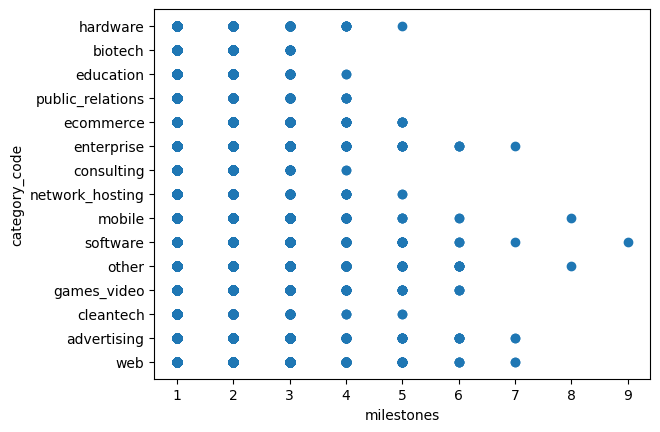

In [15]:
plot(x=dataset['milestones'],y=dataset['category_code'])

Scatterpot between Active_Days and funding_total_usd


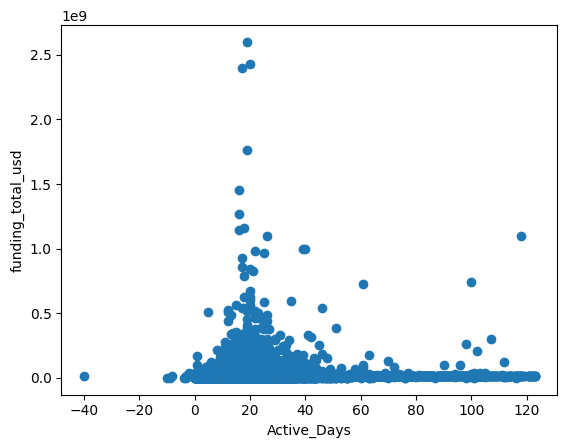

In [16]:
plot(dataset["Active_Days"], dataset["funding_total_usd"])

Scatterpot between funding_total_usd and milestones


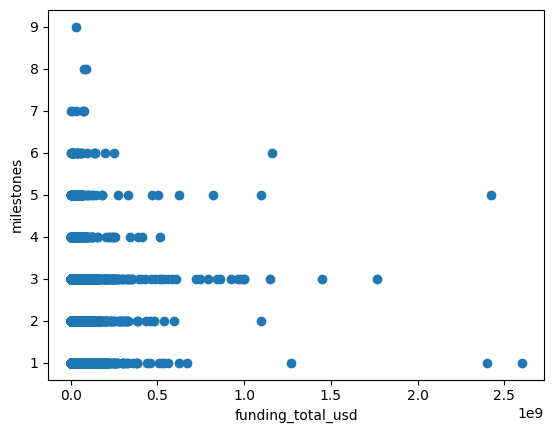

In [17]:
plot(dataset["funding_total_usd"], dataset["milestones"])

Scatterpot between relationships and category_code


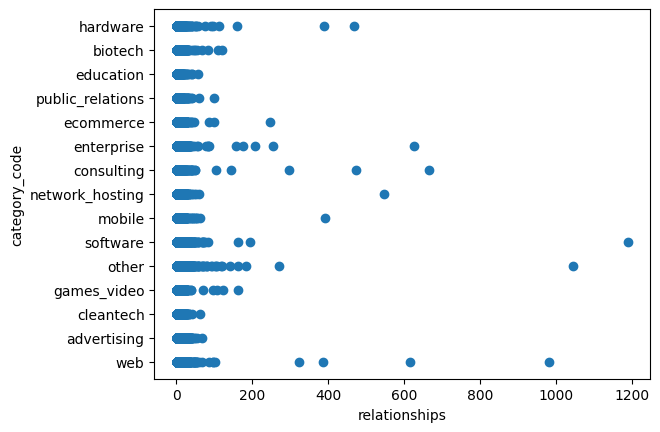

In [18]:
plot(x=dataset['relationships'],y=dataset['category_code'])

Software category has the stronges relationship.

Search and web are on the same scale in terms of relationship.

Consulting category is the next in relationship.

Local category is having the weakest relationship

Scatterpot between status and relationships


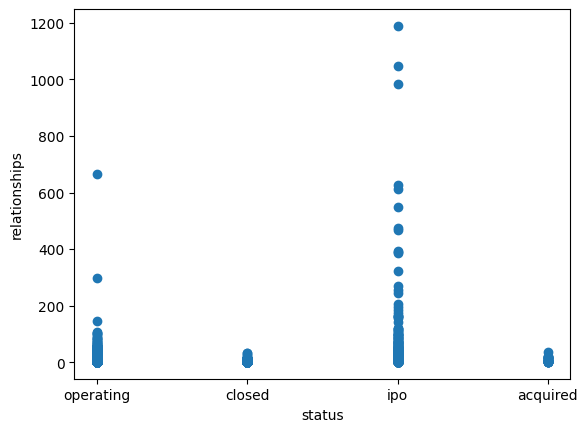

In [19]:
plot(y =dataset['relationships'],x =dataset['status'])

Scatterpot between status and milestones


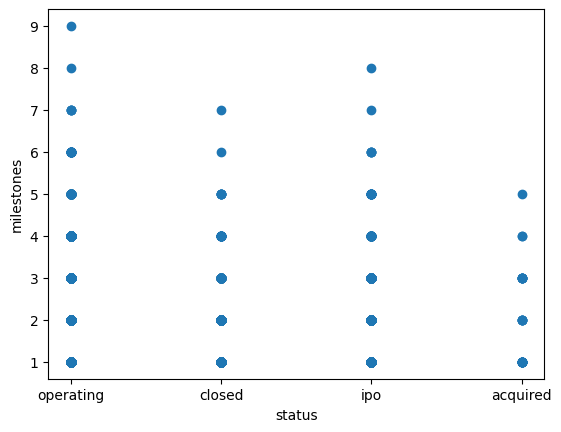

In [20]:
plot(y =dataset['milestones'],x =dataset['status'])

In [11]:
dataset.drop(['status'], axis=1,inplace=True)

<ipython-input-12-340a0244a7c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

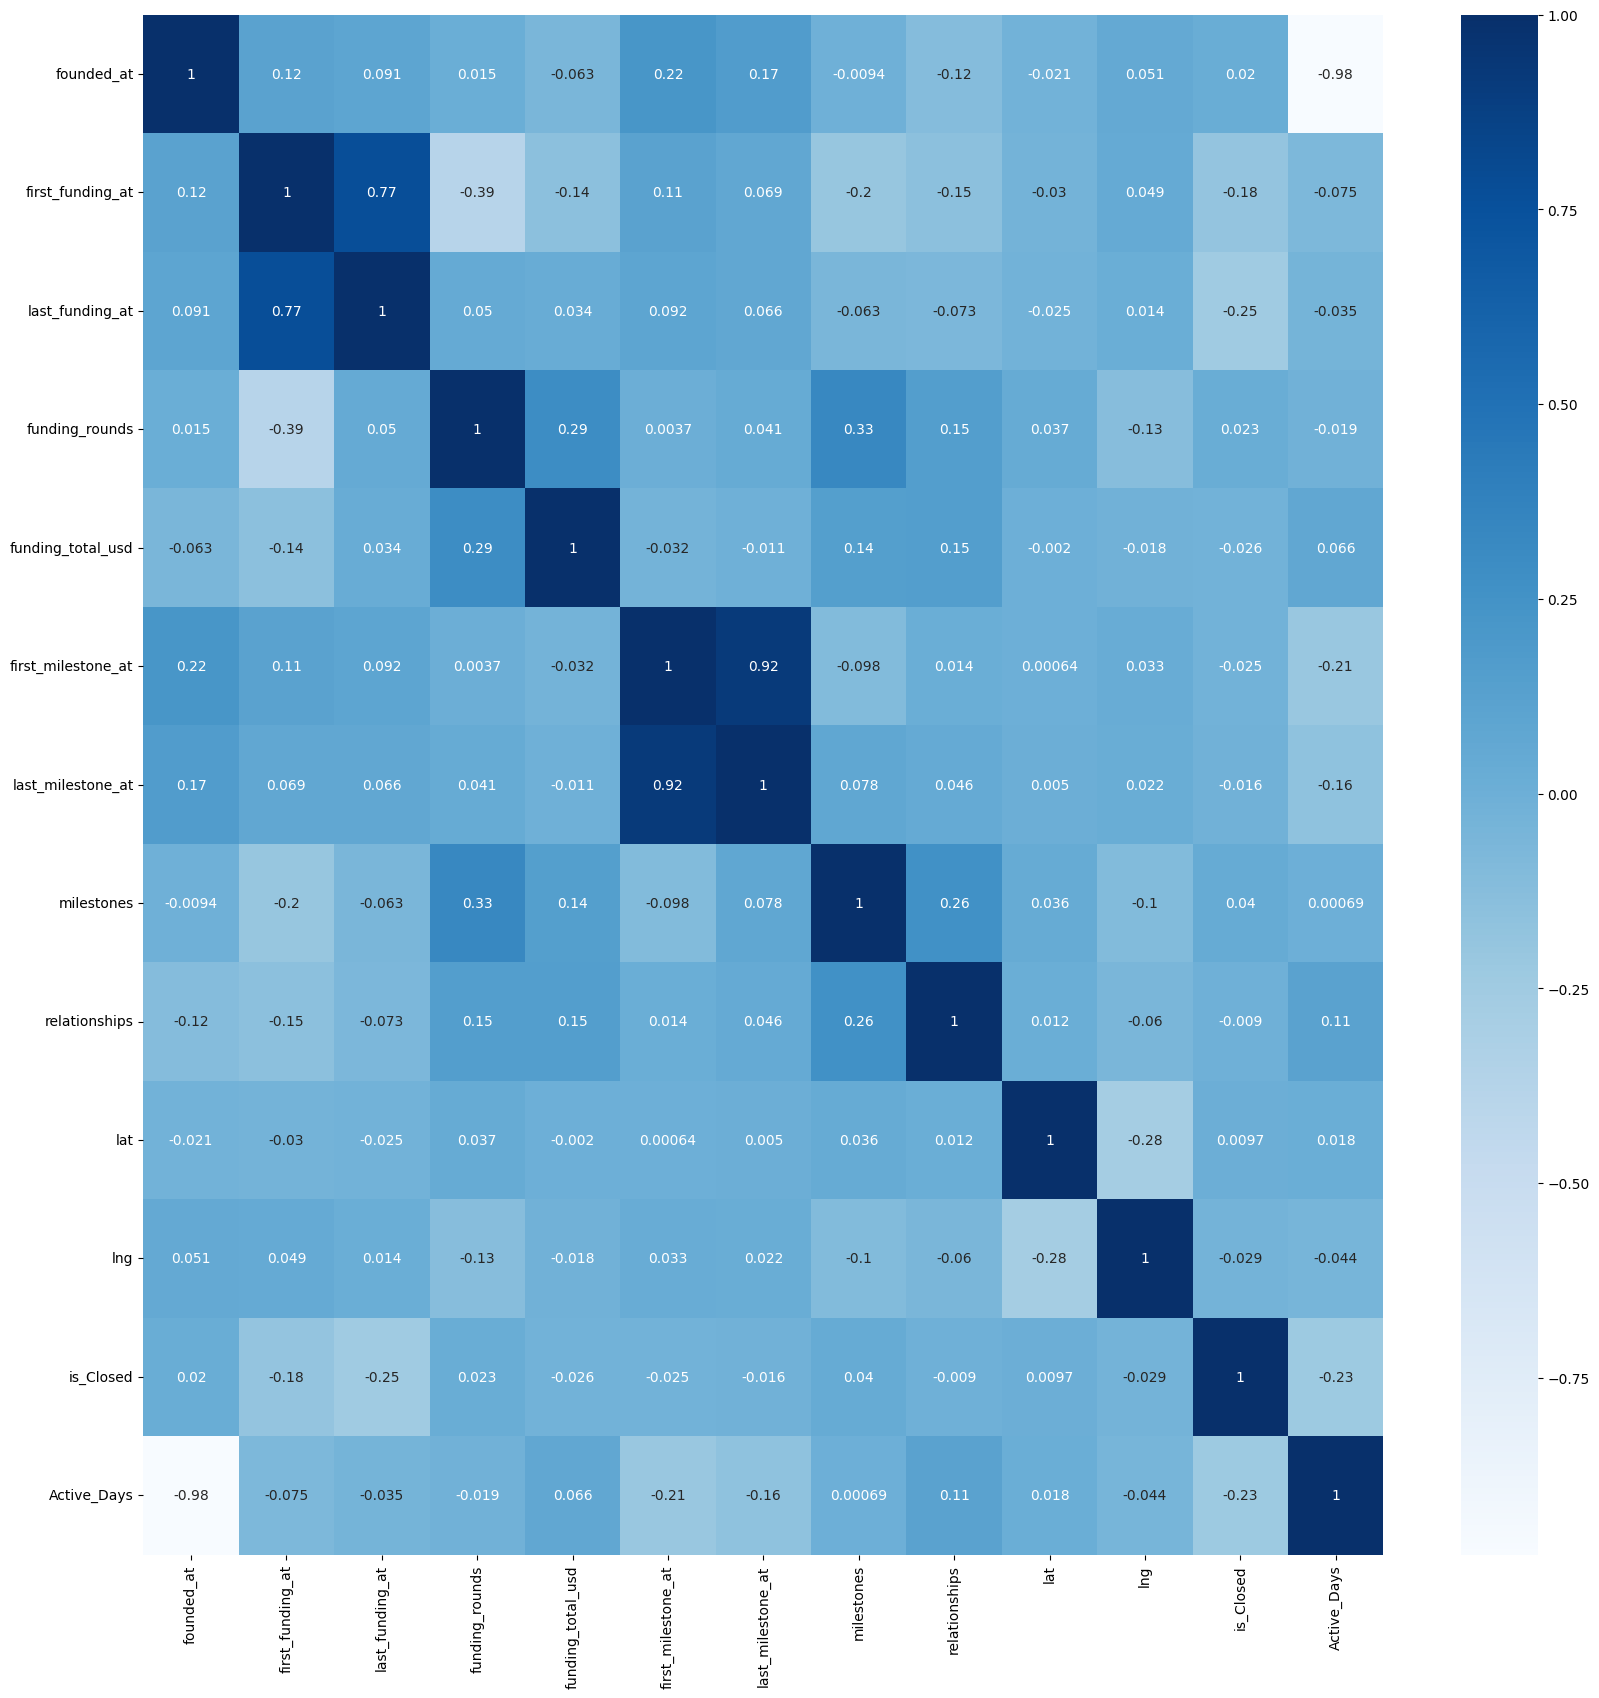

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap='Blues')

**Categorical Variable Encoding**

In [35]:
dataset.drop(['lng','lat'], axis =1, inplace=True)

In [13]:
dataset = pd.get_dummies(dataset, columns = ['category_code','country_code'])

In [36]:
print(dataset.shape)
dataset.head()

(57437, 52)


,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,is_Closed,...,country_code_ITA,country_code_JPN,country_code_NLD,country_code_POL,country_code_RUS,country_code_SGP,country_code_SWE,country_code_TUR,country_code_USA,country_code_other
0,2005,2005.0,2008.0,3.0,39750000.0,2010.0,2013.0,5.0,17.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2007,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2008,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008,2011.0,2012.0,1.0,15167025.0,2008.0,2008.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008,2011.0,2012.0,1.0,15167025.0,2008.0,2008.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
dataset.columns[:10]+dataset.columns[12:13]

Index(['founded_atActive_Days', 'first_funding_atActive_Days',
       'last_funding_atActive_Days', 'funding_roundsActive_Days',
       'funding_total_usdActive_Days', 'first_milestone_atActive_Days',
       'last_milestone_atActive_Days', 'milestonesActive_Days',
       'relationshipsActive_Days', 'latActive_Days'],
      dtype='object')

**Standard Scaling**

In [37]:
x = dataset.drop('is_Closed',axis = 1)
y = dataset.is_Closed

In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.06935314, -3.48124412, -2.5776107 , ..., -0.07148292,
         0.86353885, -0.27498981],
       [ 0.13844761,  0.17506959,  0.20757873, ..., -0.07148292,
        -1.15802549,  3.63649843],
       [ 0.24234799,  0.17506959,  0.20757873, ..., -0.07148292,
        -1.15802549, -0.27498981],
       ...,
       [-4.84877052,  0.17506959,  0.20757873, ..., -0.07148292,
         0.86353885, -0.27498981],
       [ 0.24234799,  0.17506959,  0.20757873, ..., -0.07148292,
         0.86353885, -0.27498981],
       [ 0.13844761, -1.65308726, -2.5776107 , ..., -0.07148292,
         0.86353885, -0.27498981]])

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

In [40]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


print("The number of classes before fit: {}".format(Counter(y_train)))

os = RandomOverSampler(sampling_strategy=0.75)
X_train_resampled, y_train_resampled = os.fit_resample(x_train, y_train)

print("The number of classes after fit: {}".format(Counter(y_train_resampled)))

The number of classes before fit: Counter({0: 41890, 1: 1187})
The number of classes after fit: Counter({0: 41890, 1: 31417})


In [41]:
print('Before Fit: {}'.format((y_train.shape)))
print('After Fit: {}'.format((y_train_resampled.shape)))

Before Fit: (43077,)
After Fit: (73307,)


In [42]:
y_train = y_train_resampled

PCA

In [43]:
X = X_train_resampled.copy()
pca = PCA(n_components=2)
pca_X= pca.fit_transform(X)

In [44]:
loadings = pd.DataFrame(
   data = pca_X, columns = ['principal component 1', 'principal component 2']
)
loadings['y']=y_train
loadings

,principal component 1,principal component 2,y
0,1.951181e+06,0.266022,0
1,1.951181e+06,-3.958244,0
2,-1.061584e+07,4.872009,0
3,1.951181e+06,-2.728689,0
4,1.951181e+06,-2.728783,0
...,...,...,...
73302,-9.128344e+06,5.896928,1
73303,-1.299084e+07,-7.758789,1
73304,1.728416e+07,-2.145913,1
73305,-1.061584e+07,-3.707689,1


In [45]:
loadings.describe()

,principal component 1,principal component 2,y
count,7.330700e+04,7.330700e+04,73307.000000
mean,-2.081491e-10,-2.650062e-14,0.428568
std,3.028866e+07,1.241499e+01,0.494874
min,-1.321555e+07,-1.189439e+02,0.000000
25%,-1.139420e+07,-7.299842e+00,0.000000
50%,1.951181e+06,-2.490860e+00,0.000000
75%,1.951181e+06,3.041139e+00,1.000000
max,2.586784e+09,1.626608e+02,1.000000


In [46]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 1.68009044e-13])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

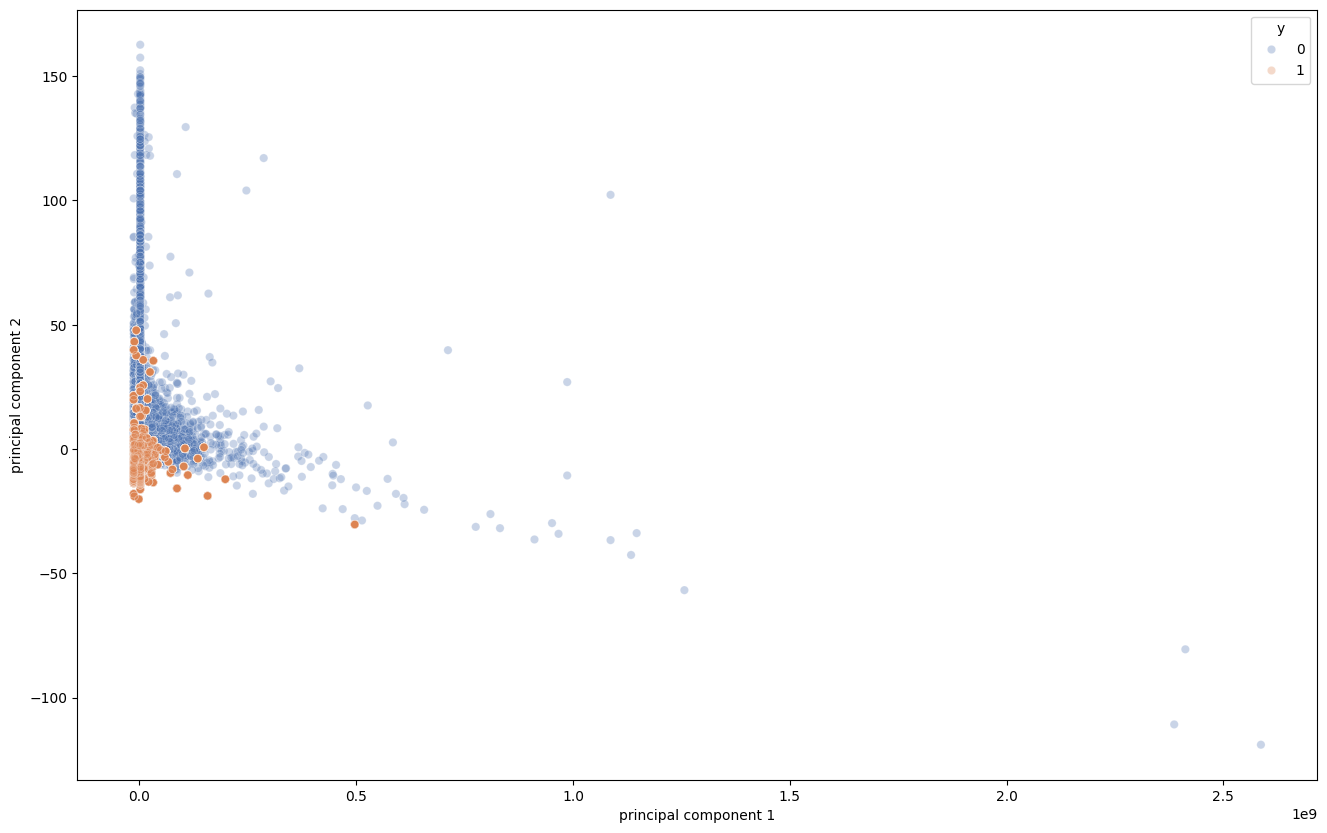

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=loadings,
    legend="full",
    alpha=0.3,
    palette="deep"
)

In [33]:
x

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,...,country_code_ITA,country_code_JPN,country_code_NLD,country_code_POL,country_code_RUS,country_code_SGP,country_code_SWE,country_code_TUR,country_code_USA,country_code_other
0,2005,2005.0,2008.0,3.0,39750000.0,2010.0,2013.0,5.0,17.0,47.606209,...,0,0,0,0,0,0,0,0,1,0
1,2007,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,2.0,30.427755,...,0,0,0,0,0,0,0,0,0,1
2,2008,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,4.0,22.307159,...,0,0,0,0,0,0,0,0,0,0
3,2008,2011.0,2012.0,1.0,15167025.0,2008.0,2008.0,1.0,2.0,35.686975,...,0,0,0,0,0,0,0,0,1,0
4,2008,2011.0,2012.0,1.0,15167025.0,2008.0,2008.0,1.0,3.0,33.078655,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57432,2007,2011.0,2012.0,1.0,15167025.0,2013.0,2013.0,2.0,5.0,37.774929,...,0,0,0,0,0,0,0,0,1,0
57433,2007,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,37.338208,...,0,0,0,0,0,0,0,0,1,0
57434,1959,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,3.0,44.0,38.882334,...,0,0,0,0,0,0,0,0,1,0
57435,2008,2011.0,2012.0,1.0,15167025.0,2012.0,2013.0,1.0,1.0,34.052234,...,0,0,0,0,0,0,0,0,1,0


**Random Forest**

In [59]:
rfc = RandomForestClassifier()